In [1]:
from typing_extensions import TypedDict
from typing import Literal

class TypeDictState(TypedDict):
    name: str
    game:Literal["cricket", "badminton"]
    

In [2]:
def play_game(state:TypeDictState):
    print("---Play Game node has been called---")
    return {"name":state['name']}

def cricket(state: TypeDictState):
    print("--Cricket node has been called--")
    return {"game":"cricket"}

def badminton(state: TypeDictState):
    print("--badminton node has been called--")
    return {"game":"badminton"}

In [3]:
# def play_game(state:TypeDictState):
#     print("---Play Game node has been called---")
#     return {"name":state['name'] + " want to play "}

# def cricket(state: TypeDictState):
#     print("--Cricket node has been called--")
#     return {"name":state["name"]+" cricket","game":"cricket"}

# def badminton(state: TypeDictState):
#     print("--badminton node has been called--")
#     return {"name":state["name"]+" badminton","game":"badminton"}

In [4]:
import random
def decide_play(state:TypeDictState)->Literal["cricket", "badminton"]:
    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"

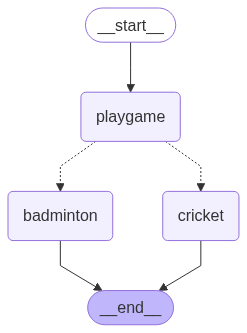

In [5]:
import random 
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder = StateGraph(TypeDictState)
builder.add_node("playgame", play_game)
builder.add_node("cricket", cricket)
builder.add_node("badminton", badminton)

# flow of the graph

builder.add_edge(START, "playgame")
builder.add_conditional_edges("playgame", decide_play)
builder.add_edge("cricket", END)
builder.add_edge("badminton", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [6]:
graph.invoke({"name":"pavi"})

---Play Game node has been called---
--Cricket node has been called--


{'name': 'pavi', 'game': 'cricket'}

In [7]:
graph.invoke({"name":123})

---Play Game node has been called---
--Cricket node has been called--


{'name': 123, 'game': 'cricket'}

In [19]:
from dataclasses import dataclass

@dataclass
class DataClassState:
    name: str
    game: Literal["badminton", "cricket"]

In [20]:
def play_game(state:DataClassState):
    print("--The Game node has been called--")
    return {"name":state.name + "want to play "}

def cricket(state:DataClassState):
    print("--Cricket node has been called--")
    return {"name":state.name + "cricket", "game": "cricket"}

def badminton(state:DataClassState):
    print("--badminton node has been called--")
    return{"name":state.name + "badminton", "game": "badminton"}

In [21]:
import random
def decide_play(state:DataClassState)->Literal['badminton', 'cricket']:
    if random.random()>0.5:
        return "cricket"
    else:
        return "badminton"

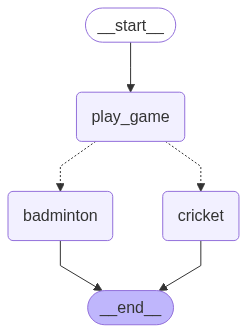

In [22]:
builder = StateGraph(DataClassState)

# build node
builder.add_node("play_game", play_game)
builder.add_node("cricket", cricket)
builder.add_node("badminton", badminton)

# add edge
builder.add_edge(START, "play_game")
builder.add_conditional_edges("play_game", decide_play)
builder.add_edge("cricket", END)
builder.add_edge("badminton", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
graph.invoke({"name":"pavi", "game": "cricket"})

--The Game node has been called--
--badminton node has been called--


{'name': 'paviwant to play badminton', 'game': 'badminton'}